# Linear Regression with one variable

In [ ]:
from google.colab import drive

drive.mount("/content/Mydrive")

Mounted at /content/Mydrive


## Libraries 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt


## Load Data

In [ ]:
data = np.loadtxt("/content/Mydrive/MyDrive/Machine Learning Data/ex1data1.txt",delimiter = ",")

X = data[:,0]
y = data[:,1]

m = y.size

In [ ]:
print(X,y,m)

(array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
         8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
         5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
        20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
        13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
         7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
        11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
         5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
         6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
        14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
        10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
         5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
         6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
         7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369]),
 array([17.59

## Plot Data

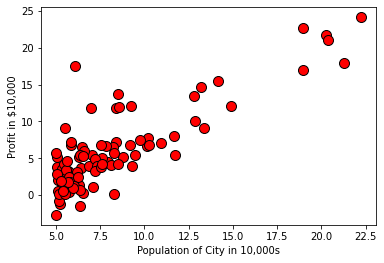

In [ ]:
def plot_data(X,y):
  fig = plt.figure()
  plt.plot(X, y, 'ro', ms=10, mec='k')
  plt.ylabel('Profit in $10,000')
  plt.xlabel('Population of City in 10,000s')
  plt.show()
plot_data(X,y)

In [ ]:
X = np.stack([np.ones(m),X],axis = 1)
# print(X)

## Compute Cost

In [ ]:
def Compute_Cost(X,y,theta):
  m = y.size
  J = 0

  J = (1/(2*m)) * np.sum((np.dot(X,theta) - y)**2)

  return J

In [ ]:
J = Compute_Cost(X,y,theta = np.array([0.0,0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07



In [ ]:
J = Compute_Cost(X,y,theta = np.array([-1,2]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24\n')

With theta = [0, 0] 
Cost computed = 54.24
Expected cost value (approximately) 54.24



## Gradient Descent

In [ ]:
def gradient_Descent(X,y,theta,num_iteration,alpha):
  m = y.shape[0]
  theta = theta.copy()
  J_history = []

  for i in range(int(num_iteration)):
    theta = theta - (alpha/m) * (np.dot(X,theta)-y).dot(X)
    J_history.append(Compute_Cost(X,y,theta))

  return theta,J_history

In [ ]:
theta = np.zeros(2)
iteration = 1500
alpha = 0.01

theta , J_history = gradient_Descent(X,y,theta,iteration,alpha)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


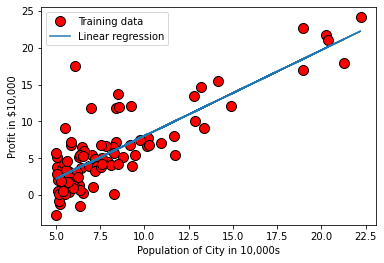

In [ ]:
plot_data(X[:,1],y)
plt.plot(X[:,1],np.dot(X,theta),'-')
plt.legend(['Training data', 'Linear regression']);

## Linear Regression for multivarable

In [ ]:
Data = np.loadtxt("/content/Mydrive/MyDrive/Machine Learning Data/ex1data2.txt",delimiter = ',')

X = Data[:,:2]
y = Data[:,2]

print(X,y,m)

 X[:,0]	 X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


## Feature Normalization

In [ ]:
def featureNormlization(X):

  X_norm = X.copy()
  mu = np.zeros(X.shape[0])
  sigma = np.zeros(X.shape[0])

  mu = np.mean(X,axis = 0)
  sigma = np.std(X,axis = 0)
  X_norm = (X-mu)/sigma

  return X_norm,mu,sigma

In [ ]:
X_norm, mu, sigma = featureNormlization(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [ ]:
X = np.concatenate([np.ones((m,1)) ,X_norm],axis = 1)

## Compute Multiple variable Cost

In [ ]:
def Compute_Cost_Multi(X,y,theta):
  theta = theta.copy()
  m = y.shape[0]
  J = 0 
  J = (1/(2*m)) * np.sum((np.dot(X,theta)-y)**2)
  return J

## Compute Multiple variable Gradient Descent

In [ ]:
def Compute_gradient_multi(X,y,theta,alpha,num_iters):
  m = y.shape[0]
  
  theta = theta.copy()
  J_history = []

  for i in range(int(num_iters)):

    theta = theta - (alpha/m) * (np.dot(X,theta)-y).dot(X)
    J_history.append(Compute_Cost_Multi(X,y,theta))
  
  return theta, J_history


theta computed from gradient descent: [340412.65957447 109447.79558639  -6578.3539709 ]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081


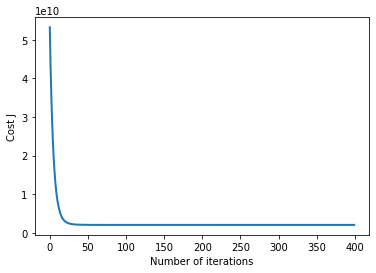

In [ ]:
alpha = 0.1
num_iters = int(400)

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = Compute_gradient_multi(X, y, theta, alpha, num_iters)

# print(J_history)
# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # You should change this

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))
